In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Consumer_Complaints.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62516 entries, 0 to 62515
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Complaint ID                  62516 non-null  int64 
 1   Submitted via                 62516 non-null  object
 2   Date submitted                62516 non-null  object
 3   Date received                 62516 non-null  object
 4   State                         62516 non-null  object
 5   Product                       62516 non-null  object
 6   Sub-product                   62509 non-null  object
 7   Issue                         62516 non-null  object
 8   Sub-issue                     51658 non-null  object
 9   Company public response       60341 non-null  object
 10  Company response to consumer  62516 non-null  object
 11  Timely response?              61022 non-null  object
dtypes: int64(1), object(11)
memory usage: 5.7+ MB


,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,NaN
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes


In [23]:
df.duplicated()
df.isnull()


,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
62511,False,False,False,False,False,False,False,False,False,False,False,False
62512,False,False,False,False,False,False,False,False,False,False,False,False
62513,False,False,False,False,False,False,False,False,True,False,False,False
62514,False,False,False,False,False,False,False,False,True,False,False,False


In [24]:
df.fillna("N.A" ,inplace=True )
df.isnull().sum()


Complaint ID                    0
Submitted via                   0
Date submitted                  0
Date received                   0
State                           0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Company public response         0
Company response to consumer    0
Timely response?                0
dtype: int64

In [25]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


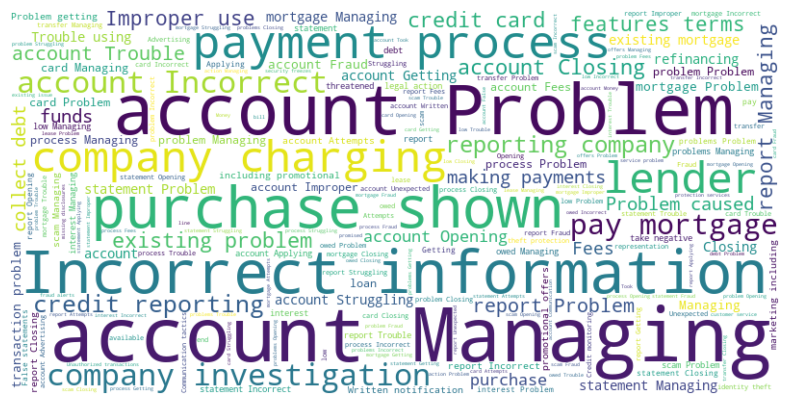

In [26]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS  
import matplotlib.pyplot as plt

# Choosing  the column I want to analyze
column_name = "Issue"   

# Combine all text from that column
text = " ".join(df[column_name].dropna().astype(str))

# Define stopwords (common words to ignore)
stopwords = set(STOPWORDS)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color="white",
                      stopwords=stopwords,
                      colormap="viridis",
                      max_words=200).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [27]:

!pip install nltk
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
from collections import Counter

In [ ]:
df['Date submitted'] = pd.to_datetime(df['Date submitted'])
df['Date received'] = pd.to_datetime(df['Date received'])
df

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Company response to consumer,Timely response?,Response_Lag_Days,Resolution_Label,Year,Month,Month_Name
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Closed with explanation,Yes,3,Explanation,2021,10,October
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,Closed with monetary relief,Yes,0,Monetary Relief,2020,4,April
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Closed with explanation,Yes,0,Explanation,2022,7,July
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,In progress,N.A,1,In Progress,2023,7,July
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Closed with explanation,Yes,1,Explanation,2022,7,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62511,2501211,Web,2017-06-04,2017-06-04,TX,Checking or savings account,Checking account,Managing an account,Closed with explanation,Yes,0,Explanation,2017,6,June
62512,2472406,Referral,2017-05-01,2017-05-05,VA,Checking or savings account,Other banking product or service,Problem caused by your funds being low,Closed with explanation,Yes,4,Explanation,2017,5,May
62513,3704015,Web,2020-06-17,2020-06-17,TN,"Credit reporting, credit repair services, or o...",Credit repair services,Confusing or missing disclosures,Closed with explanation,Yes,0,Explanation,2020,6,June
62514,2488973,Referral,2017-05-19,2017-05-19,GA,Mortgage,Other type of mortgage,Trouble during payment process,Closed with explanation,Yes,0,Explanation,2017,5,May


In [41]:
df['Resolution_Label'] = df['Company response to consumer'].map({
    'Closed with explanation'        : 'Explanation',
    'Closed with monetary relief'    : 'Monetary Relief',
    'Closed with non-monetary relief': 'Non-Monetary Relief',
    'Closed'                         : 'Closed',
    'In progress'                    : 'In Progress'
})
df['Year']           = df['Date submitted'].dt.year
df['Month']          = df['Date submitted'].dt.month
df['Month_Name']     = df['Date submitted'].dt.month_name()
df

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Company response to consumer,Timely response?,Response_Lag_Days,Resolution_Label,Year,Month,Month_Name
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Closed with explanation,Yes,3,Explanation,2021,10,October
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,Closed with monetary relief,Yes,0,Monetary Relief,2020,4,April
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Closed with explanation,Yes,0,Explanation,2022,7,July
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,In progress,N.A,1,In Progress,2023,7,July
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Closed with explanation,Yes,1,Explanation,2022,7,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62511,2501211,Web,2017-06-04,2017-06-04,TX,Checking or savings account,Checking account,Managing an account,Closed with explanation,Yes,0,Explanation,2017,6,June
62512,2472406,Referral,2017-05-01,2017-05-05,VA,Checking or savings account,Other banking product or service,Problem caused by your funds being low,Closed with explanation,Yes,4,Explanation,2017,5,May
62513,3704015,Web,2020-06-17,2020-06-17,TN,"Credit reporting, credit repair services, or o...",Credit repair services,Confusing or missing disclosures,Closed with explanation,Yes,0,Explanation,2020,6,June
62514,2488973,Referral,2017-05-19,2017-05-19,GA,Mortgage,Other type of mortgage,Trouble during payment process,Closed with explanation,Yes,0,Explanation,2017,5,May


In [38]:
df.drop(columns=['Year','Month','Month_Name'], inplace=True)

print(df.columns.tolist())

['Complaint ID', 'Submitted via', 'Date submitted', 'Date received', 'State', 'Product', 'Sub-product', 'Issue', 'Company response to consumer', 'Timely response?', 'Response_Lag_Days', 'Resolution_Label']


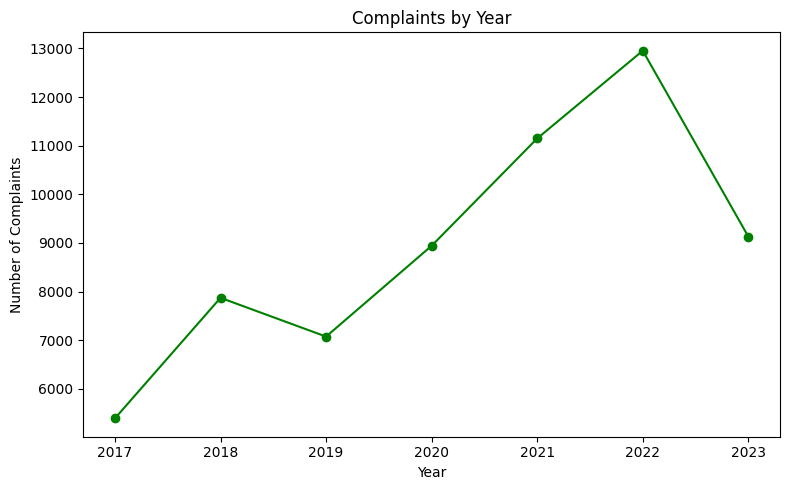

In [50]:
# Bank of America Consumer Complaints — Basic Visualization


# Complaints by Year:
year_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.plot(year_counts.index, year_counts.values, marker='o', color='green')
plt.title('Complaints by Year')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.tight_layout()
plt.show()


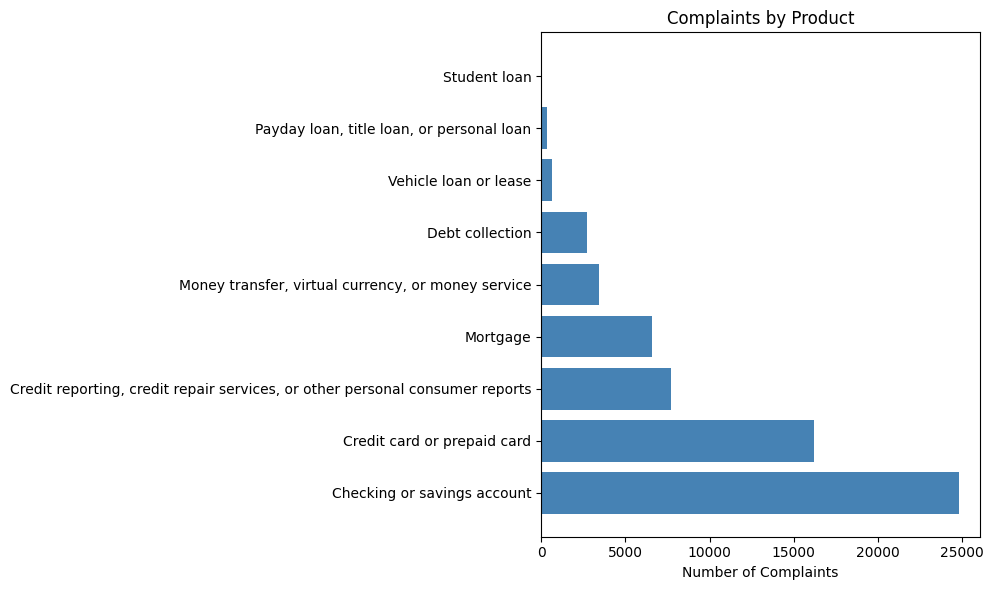

In [53]:
#Complaints by Product
product_counts = df['Product'].value_counts()

plt.figure(figsize=(10, 6))
plt.barh(product_counts.index, product_counts.values, color='steelblue')
plt.title('Complaints by Product')
plt.xlabel('Number of Complaints')
plt.tight_layout()
plt.show()

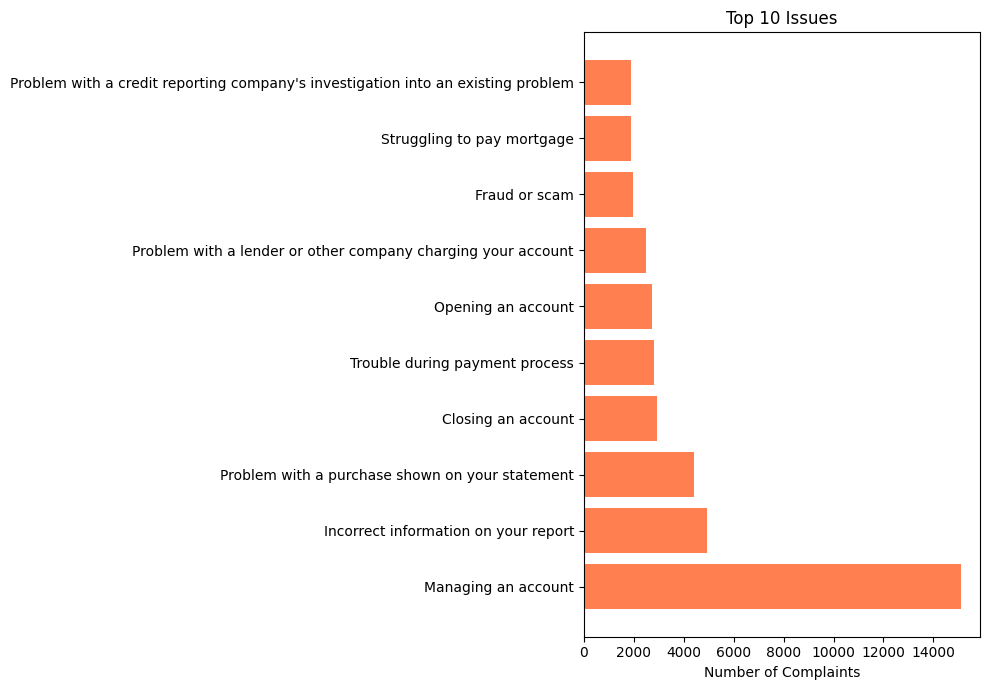

In [54]:
# Top 10 Issues 
issue_counts = df['Issue'].value_counts().head(10)

plt.figure(figsize=(10, 7))
plt.barh(issue_counts.index, issue_counts.values, color='coral')
plt.title('Top 10 Issues')
plt.xlabel('Number of Complaints')
plt.tight_layout()
plt.show()


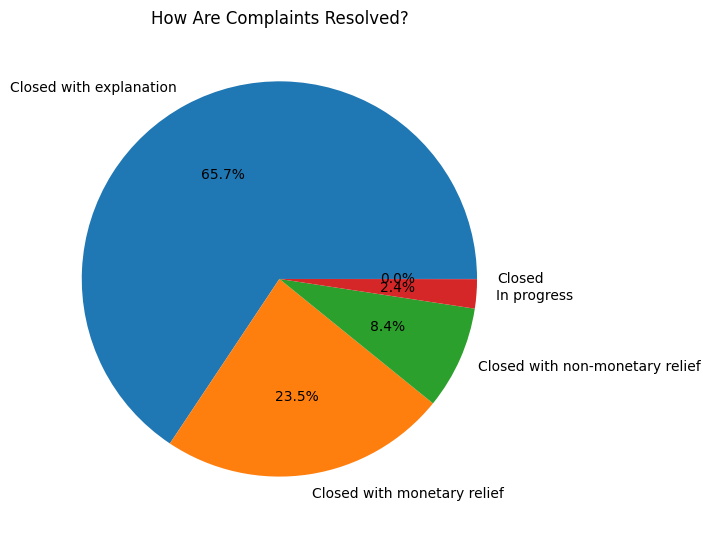

In [59]:
# Resolution Breakdown
resolution_counts = df['Company response to consumer'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(resolution_counts.values, labels=resolution_counts.index,autopct='%1.1f%%')
plt.title('How Are Complaints Resolved?')
plt.tight_layout()
plt.savefig('chart3_resolution.png')
plt.show()

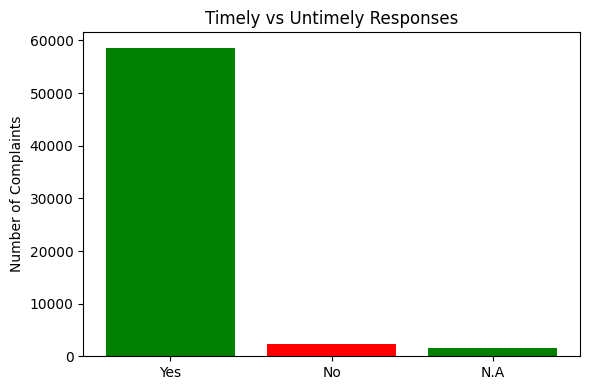

In [63]:
# Timely vs Untimely Responses
timely_counts = df['Timely response?'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(timely_counts.index, timely_counts.values, color=['green', 'red'])
plt.title('Timely vs Untimely Responses')
plt.ylabel('Number of Complaints')
plt.tight_layout()
plt.show()

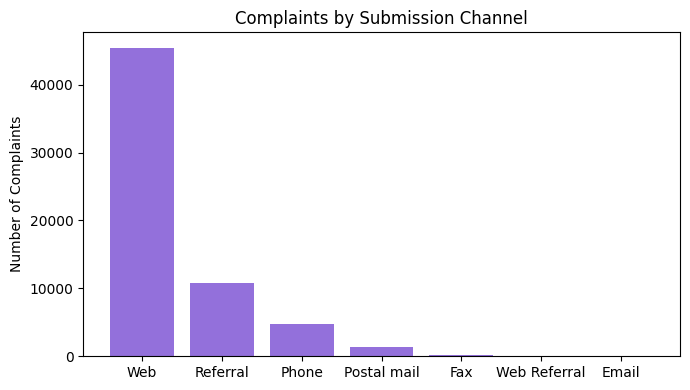

In [ ]:
#Complaints by Submission Channel
channel_counts = df['Submitted via'].value_counts()

plt.figure(figsize=(7, 4))
plt.bar(channel_counts.index, channel_counts.values, color='mediumpurple')
plt.title('Complaints by Submission Channel')
plt.ylabel('Number of Complaints')
plt.tight_layout()
plt.savefig('chart6_channels.png')
plt.show()

In [65]:
df.to_csv('Consumer_Complaints_Cleaned.csv', index=False)